In [188]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
import pandas as pd
import csv


file_name = 'Climate_year_DF.xlsx'
storm = 'pacific.csv'
Climate = pd.read_excel(file_name)
Cyclone = pd.read_csv(storm)

In [189]:
# Cyclone['Date'] = pd.to_datetime(Cyclone['Date'])
# 1980 ~ 2010 
Cyclone['Date']	=	pd.to_datetime(Cyclone['Date'],	format='%Y%m%d')
Cyclone = Cyclone[(Cyclone['Date'].dt.year>=1980) & (Cyclone['Date'].dt.year<=2010)]
Cyclone.drop(['Low Wind NE','Low Wind SE','Low Wind SW','Low Wind NW','Moderate Wind NE','Moderate Wind SE','Moderate Wind SW','Moderate Wind NW','High Wind NE','High Wind SE','High Wind SW','High Wind NW'], axis=1, inplace=True)


In [190]:
Cyclone

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure
7625,EP011980,AGATHA,1980-06-09,0,,TD,8.9N,111.0W,30,-999
7626,EP011980,AGATHA,1980-06-09,600,,TD,8.7N,111.8W,30,-999
7627,EP011980,AGATHA,1980-06-09,1200,,TD,8.5N,112.8W,30,-999
7628,EP011980,AGATHA,1980-06-09,1800,,TS,8.3N,113.7W,45,-999
7629,EP011980,AGATHA,1980-06-10,0,,TS,8.4N,114.5W,45,-999
...,...,...,...,...,...,...,...,...,...,...
23096,CP012010,OMEKA,2010-12-21,1800,,PT,29.0N,172.6W,35,1002
23097,CP012010,OMEKA,2010-12-22,0,,PT,30.7N,172.2W,30,1002
23098,CP012010,OMEKA,2010-12-22,600,,PT,32.2N,172.4W,30,1004
23099,CP012010,OMEKA,2010-12-22,1200,,PT,33.3N,172.3W,25,1006


In [191]:
Cyclone['Name']= Cyclone['Name'].str.rstrip().str.lstrip()
len(Cyclone[Cyclone['Name'] == 'UNNAMED']['ID'].unique())   # 63개의 언네임드 태풍 존재.

63

In [192]:
len(Cyclone['ID'].unique()), len(Cyclone['Name'].unique())

(594, 182)

In [193]:
[]

[]

In [194]:
Cyclone['Status'].unique()

array([' TD', ' TS', ' HU', ' ET', ' LO', ' EX', ' DB', ' SD', ' SS',
       ' PT'], dtype=object)

In [195]:
# 년도별 ID 갯수 세기 = 년도별 태풍 발생 갯수
# # len(Cyclone[Cyclone['Date'].dt.year == 1980]['ID'].unique())

In [196]:
Created_Cyclone = []
for y in range(1980,2011):
    Created_Cyclone.append(len(Cyclone[Cyclone['Date'].dt.year == y]['ID'].unique()))
Created_Cyclone

[14,
 15,
 23,
 21,
 21,
 23,
 17,
 20,
 22,
 24,
 25,
 16,
 30,
 18,
 22,
 11,
 13,
 24,
 16,
 14,
 21,
 19,
 19,
 17,
 17,
 17,
 25,
 15,
 19,
 23,
 13]

In [197]:
CC = {}
idx = 0
for i in range(1980,2011):
    CC[f'{i}'] = Created_Cyclone[idx]
    idx+=1
CC


{'1980': 14,
 '1981': 15,
 '1982': 23,
 '1983': 21,
 '1984': 21,
 '1985': 23,
 '1986': 17,
 '1987': 20,
 '1988': 22,
 '1989': 24,
 '1990': 25,
 '1991': 16,
 '1992': 30,
 '1993': 18,
 '1994': 22,
 '1995': 11,
 '1996': 13,
 '1997': 24,
 '1998': 16,
 '1999': 14,
 '2000': 21,
 '2001': 19,
 '2002': 19,
 '2003': 17,
 '2004': 17,
 '2005': 17,
 '2006': 25,
 '2007': 15,
 '2008': 19,
 '2009': 23,
 '2010': 13}

In [210]:
# CCdf = pd.DataFrame(CC)
# CC = list(CC.keys())
# CC

AttributeError: 'list' object has no attribute 'keys'

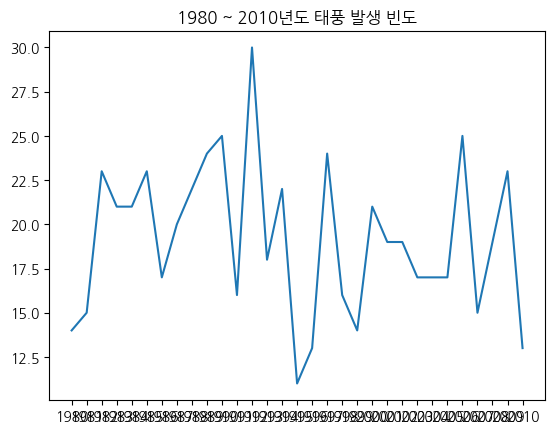

In [199]:
# year_list = [i for i in range(1980,2011)]
plt.plot(CC,Created_Cyclone)
plt.title('1980 ~ 2010년도 태풍 발생 빈도')
plt.show()

In [209]:
lat = len(Cyclone['Latitude'].values.tolist())
lon = Cyclone['Longitude'].values.tolist()

# type(Cyclone['Latitude'].values.tolist())